In [2]:
from matplotlib.colors import DivergingNorm


In [3]:

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


#imports
#numpy, pandas, scipy, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt


#estimatores

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression  #for RFE
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
#from sklearn.svm import SVC
from sklearn import linear_model
#from sklearn.neighbors import KNeighborsClassifier


#model metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split



In [4]:
#Models
modelRF = RandomForestClassifier()
modelAdBoost = AdaBoostClassifier()
modelCatBoost = CatBoostClassifier()

In [5]:
#data
rawData = pd.read_csv('credit.csv')
rawData.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
rawData.shape

(30000, 25)

In [7]:
#features
features = rawData.iloc[:,1:25]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
type(features)

pandas.core.frame.DataFrame

In [9]:
#dependent variable
y = features['Default']
print(y)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 30000, dtype: int64


In [10]:
features.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
##import matplotlib.pyplot as plt

# Load f
X = features[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = features['Default']

# Create the RFE object and rank each pixel
lg = LogisticRegression()
rfe_lg = RFE(lg,24)
rfe_lg = rfe_lg.fit(X, y)
RFE_ranking_lg = rfe_lg.ranking_
print(rfe_lg.support_)
print(RFE_ranking_lg)

# # Plot pixel ranking
# plt.matshow(ranking, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.title("Ranking of pixels with RFE")
# plt.show()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
from numpy import bincount, linspace, mean, std, arange, squeeze

#y_target = rawData['Default'].values

columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
               'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
               'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
               'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

X = features[columns]


## meaning of stratify = _y_target. returns test and training data having the same proportions of class label '_y_target'
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size =0.30, 
                                                  stratify = y, random_state = 1)

## lets check the distribution. we can see 4times the lower value as was the case before as well. train/test set distributed well
print("label counts in y train %s" %bincount(y_train))
print("label counts in y test %s" %bincount(y_test))

label counts in y train [16355  4645]
label counts in y test [7009 1991]


In [13]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_Val_RF = cross_val_score(modelRF, X_train, y_train)

In [16]:
print(cross_Val_RF) 

[0.80217112 0.81185714 0.80054293]


In [17]:

print(mean(cross_Val_RF))

0.8048570653245855


In [18]:
modelRF.score(X_train,y_train)

0.9799523809523809

In [19]:
predictions_rf = modelRF.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7009
           1       0.61      0.32      0.42      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000



In [22]:
#target = 'Deafault'
predictors = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
               'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
               'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
               'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [23]:
import seaborn as sns

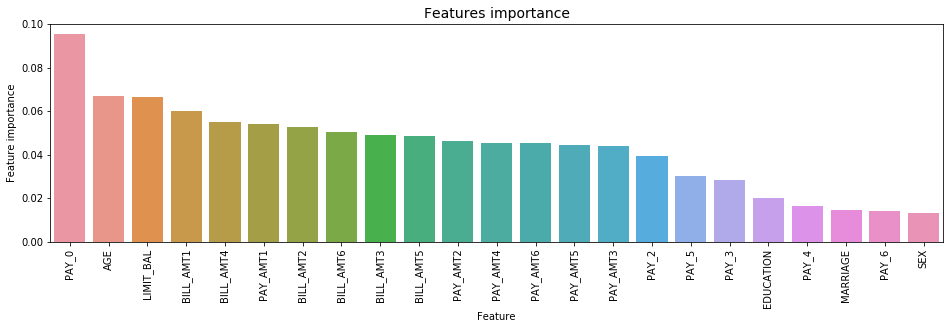

In [24]:
#Features importance
import matplotlib.pyplot as plt
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': modelRF.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [25]:
#The most important features are Pay_0, Age, LIMIT_BAL, BILL_AMT1, BILL_AMT2 as per RF 

[[6602  407]
 [1354  637]]


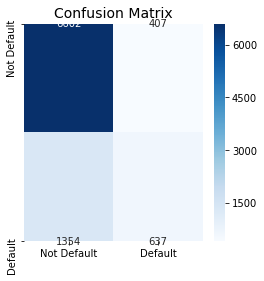

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
CM_RF = confusion_matrix(y_test, predictions_rf)
print (CM_RF)
fig, (ax1) = plt.subplots(ncols = 1, figsize=(4,4))
sns.heatmap(CM_RF, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            linecolor="Darkblue", cmap="Blues", fmt='g', annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [27]:
##AdaBoostClassifier

modelAdBoost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [69]:
cross_Val_AdBoost = cross_val_score(modelAdBoost, X_train, y_train)

In [70]:
print(cross_Val_AdBoost) 

[0.81188402 0.823      0.81868838]


In [71]:
print(mean(cross_Val_AdBoost))

0.8178574668746422


In [29]:
modelAdBoost.score(X_train, y_train)

0.8196190476190476

In [30]:
print('Accuaracy:', modelAdBoost.score(X_train, y_train))

Accuaracy: 0.8196190476190476


In [31]:
predictions_AdaBoost= modelAdBoost.predict(X_test)

In [32]:
print(classification_report(y_test, predictions_AdaBoost))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.68      0.33      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



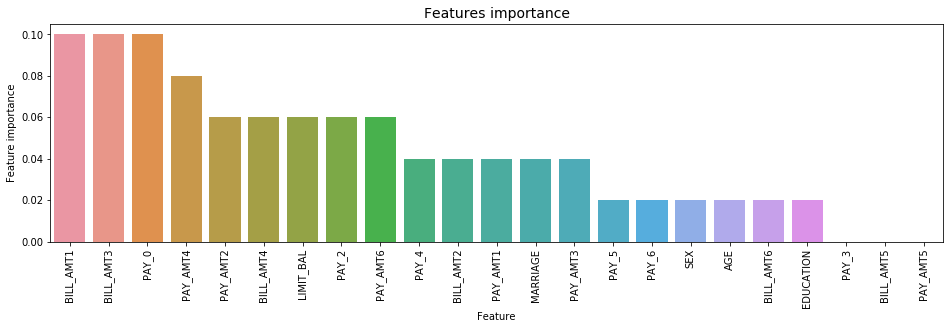

In [33]:
#Features importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': modelAdBoost.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

[[6602  407]
 [1354  637]]


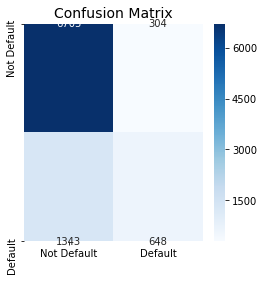

In [61]:
# Confusion Matrix
CM_AdaBoost = confusion_matrix(y_test, predictions_AdaBoost)
print (CM_RF)
fig, (ax1) = plt.subplots(ncols = 1, figsize=(4,4))
sns.heatmap(CM_AdaBoost, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            linecolor="Darkblue", cmap="Blues", fmt='g', annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [62]:
##CatBoostClassifier

modelCatBoost.fit(X_train,y_train)

Learning rate set to 0.039656
0:	learn: 0.6702740	total: 47.5ms	remaining: 47.5s
1:	learn: 0.6502816	total: 72.2ms	remaining: 36s
2:	learn: 0.6316306	total: 92.3ms	remaining: 30.7s
3:	learn: 0.6149455	total: 113ms	remaining: 28.2s
4:	learn: 0.5993205	total: 136ms	remaining: 27s
5:	learn: 0.5850151	total: 156ms	remaining: 25.8s
6:	learn: 0.5723533	total: 189ms	remaining: 26.8s
7:	learn: 0.5607774	total: 211ms	remaining: 26.1s
8:	learn: 0.5497601	total: 231ms	remaining: 25.5s
9:	learn: 0.5396514	total: 252ms	remaining: 24.9s
10:	learn: 0.5305430	total: 270ms	remaining: 24.3s
11:	learn: 0.5227090	total: 288ms	remaining: 23.7s
12:	learn: 0.5154807	total: 306ms	remaining: 23.3s
13:	learn: 0.5083524	total: 326ms	remaining: 23s
14:	learn: 0.5019311	total: 346ms	remaining: 22.7s
15:	learn: 0.4961397	total: 367ms	remaining: 22.6s
16:	learn: 0.4908293	total: 391ms	remaining: 22.6s
17:	learn: 0.4861614	total: 409ms	remaining: 22.3s
18:	learn: 0.4818274	total: 428ms	remaining: 22.1s
19:	learn: 0.4

166:	learn: 0.4110641	total: 5.53s	remaining: 27.6s
167:	learn: 0.4109310	total: 5.55s	remaining: 27.5s
168:	learn: 0.4108545	total: 5.58s	remaining: 27.4s
169:	learn: 0.4107174	total: 5.6s	remaining: 27.4s
170:	learn: 0.4105874	total: 5.63s	remaining: 27.3s
171:	learn: 0.4104934	total: 5.65s	remaining: 27.2s
172:	learn: 0.4104246	total: 5.67s	remaining: 27.1s
173:	learn: 0.4103015	total: 5.69s	remaining: 27s
174:	learn: 0.4102266	total: 5.72s	remaining: 27s
175:	learn: 0.4101016	total: 5.75s	remaining: 26.9s
176:	learn: 0.4100070	total: 5.78s	remaining: 26.9s
177:	learn: 0.4098925	total: 5.81s	remaining: 26.8s
178:	learn: 0.4098182	total: 5.86s	remaining: 26.9s
179:	learn: 0.4097307	total: 5.89s	remaining: 26.8s
180:	learn: 0.4096633	total: 5.91s	remaining: 26.8s
181:	learn: 0.4095678	total: 5.94s	remaining: 26.7s
182:	learn: 0.4094861	total: 5.96s	remaining: 26.6s
183:	learn: 0.4093837	total: 5.98s	remaining: 26.5s
184:	learn: 0.4092741	total: 6.01s	remaining: 26.5s
185:	learn: 0.409

327:	learn: 0.3937424	total: 9.26s	remaining: 19s
328:	learn: 0.3936007	total: 9.28s	remaining: 18.9s
329:	learn: 0.3934606	total: 9.32s	remaining: 18.9s
330:	learn: 0.3933586	total: 9.34s	remaining: 18.9s
331:	learn: 0.3932901	total: 9.37s	remaining: 18.9s
332:	learn: 0.3931370	total: 9.39s	remaining: 18.8s
333:	learn: 0.3930798	total: 9.41s	remaining: 18.8s
334:	learn: 0.3929734	total: 9.44s	remaining: 18.7s
335:	learn: 0.3928686	total: 9.46s	remaining: 18.7s
336:	learn: 0.3927353	total: 9.5s	remaining: 18.7s
337:	learn: 0.3926132	total: 9.52s	remaining: 18.6s
338:	learn: 0.3924743	total: 9.54s	remaining: 18.6s
339:	learn: 0.3923802	total: 9.56s	remaining: 18.6s
340:	learn: 0.3922988	total: 9.59s	remaining: 18.5s
341:	learn: 0.3922421	total: 9.61s	remaining: 18.5s
342:	learn: 0.3921441	total: 9.63s	remaining: 18.5s
343:	learn: 0.3920507	total: 9.65s	remaining: 18.4s
344:	learn: 0.3918752	total: 9.68s	remaining: 18.4s
345:	learn: 0.3917602	total: 9.7s	remaining: 18.3s
346:	learn: 0.39

489:	learn: 0.3771055	total: 13s	remaining: 13.6s
490:	learn: 0.3769666	total: 13.1s	remaining: 13.5s
491:	learn: 0.3768234	total: 13.1s	remaining: 13.5s
492:	learn: 0.3767310	total: 13.1s	remaining: 13.5s
493:	learn: 0.3766699	total: 13.1s	remaining: 13.4s
494:	learn: 0.3765743	total: 13.1s	remaining: 13.4s
495:	learn: 0.3765293	total: 13.2s	remaining: 13.4s
496:	learn: 0.3764402	total: 13.2s	remaining: 13.3s
497:	learn: 0.3763625	total: 13.2s	remaining: 13.3s
498:	learn: 0.3762873	total: 13.2s	remaining: 13.3s
499:	learn: 0.3761944	total: 13.3s	remaining: 13.3s
500:	learn: 0.3760929	total: 13.3s	remaining: 13.2s
501:	learn: 0.3759980	total: 13.3s	remaining: 13.2s
502:	learn: 0.3759010	total: 13.3s	remaining: 13.2s
503:	learn: 0.3757849	total: 13.3s	remaining: 13.1s
504:	learn: 0.3757030	total: 13.4s	remaining: 13.1s
505:	learn: 0.3755942	total: 13.4s	remaining: 13.1s
506:	learn: 0.3754683	total: 13.4s	remaining: 13s
507:	learn: 0.3754088	total: 13.4s	remaining: 13s
508:	learn: 0.3753

654:	learn: 0.3623857	total: 16.8s	remaining: 8.86s
655:	learn: 0.3622969	total: 16.8s	remaining: 8.83s
656:	learn: 0.3622286	total: 16.9s	remaining: 8.81s
657:	learn: 0.3621541	total: 16.9s	remaining: 8.78s
658:	learn: 0.3620106	total: 16.9s	remaining: 8.76s
659:	learn: 0.3619821	total: 16.9s	remaining: 8.73s
660:	learn: 0.3618869	total: 17s	remaining: 8.7s
661:	learn: 0.3617874	total: 17s	remaining: 8.67s
662:	learn: 0.3617189	total: 17s	remaining: 8.65s
663:	learn: 0.3616122	total: 17s	remaining: 8.62s
664:	learn: 0.3615134	total: 17.1s	remaining: 8.6s
665:	learn: 0.3614313	total: 17.1s	remaining: 8.57s
666:	learn: 0.3613056	total: 17.1s	remaining: 8.54s
667:	learn: 0.3612603	total: 17.1s	remaining: 8.51s
668:	learn: 0.3612173	total: 17.1s	remaining: 8.48s
669:	learn: 0.3611453	total: 17.2s	remaining: 8.45s
670:	learn: 0.3610460	total: 17.2s	remaining: 8.43s
671:	learn: 0.3609755	total: 17.2s	remaining: 8.4s
672:	learn: 0.3609281	total: 17.3s	remaining: 8.38s
673:	learn: 0.3608684	t

816:	learn: 0.3495274	total: 20.4s	remaining: 4.57s
817:	learn: 0.3494660	total: 20.4s	remaining: 4.54s
818:	learn: 0.3493627	total: 20.4s	remaining: 4.51s
819:	learn: 0.3492878	total: 20.5s	remaining: 4.49s
820:	learn: 0.3492048	total: 20.5s	remaining: 4.46s
821:	learn: 0.3491370	total: 20.5s	remaining: 4.44s
822:	learn: 0.3490205	total: 20.5s	remaining: 4.41s
823:	learn: 0.3489819	total: 20.5s	remaining: 4.38s
824:	learn: 0.3489456	total: 20.5s	remaining: 4.36s
825:	learn: 0.3488562	total: 20.6s	remaining: 4.33s
826:	learn: 0.3487557	total: 20.6s	remaining: 4.31s
827:	learn: 0.3486379	total: 20.6s	remaining: 4.28s
828:	learn: 0.3485707	total: 20.6s	remaining: 4.26s
829:	learn: 0.3484548	total: 20.7s	remaining: 4.23s
830:	learn: 0.3483495	total: 20.7s	remaining: 4.2s
831:	learn: 0.3482783	total: 20.7s	remaining: 4.18s
832:	learn: 0.3482142	total: 20.7s	remaining: 4.15s
833:	learn: 0.3481507	total: 20.7s	remaining: 4.13s
834:	learn: 0.3480614	total: 20.8s	remaining: 4.1s
835:	learn: 0.

978:	learn: 0.3374670	total: 23.9s	remaining: 513ms
979:	learn: 0.3373944	total: 23.9s	remaining: 488ms
980:	learn: 0.3373528	total: 24s	remaining: 464ms
981:	learn: 0.3372538	total: 24s	remaining: 440ms
982:	learn: 0.3372000	total: 24s	remaining: 415ms
983:	learn: 0.3371507	total: 24s	remaining: 391ms
984:	learn: 0.3370709	total: 24s	remaining: 366ms
985:	learn: 0.3370129	total: 24.1s	remaining: 342ms
986:	learn: 0.3369340	total: 24.1s	remaining: 317ms
987:	learn: 0.3368944	total: 24.1s	remaining: 293ms
988:	learn: 0.3368526	total: 24.1s	remaining: 268ms
989:	learn: 0.3367363	total: 24.1s	remaining: 244ms
990:	learn: 0.3366629	total: 24.2s	remaining: 220ms
991:	learn: 0.3365402	total: 24.2s	remaining: 195ms
992:	learn: 0.3364836	total: 24.2s	remaining: 171ms
993:	learn: 0.3364149	total: 24.2s	remaining: 146ms
994:	learn: 0.3363579	total: 24.3s	remaining: 122ms
995:	learn: 0.3363100	total: 24.3s	remaining: 97.6ms
996:	learn: 0.3361936	total: 24.3s	remaining: 73.2ms
997:	learn: 0.336122

In [63]:
cross_Val_CatBoost = cross_val_score(modelCatBoost, X_train, y_train)

Learning rate set to 0.035357
0:	learn: 0.6730716	total: 18.7ms	remaining: 18.7s
1:	learn: 0.6552199	total: 42.9ms	remaining: 21.4s
2:	learn: 0.6384776	total: 58.3ms	remaining: 19.4s
3:	learn: 0.6232793	total: 74.2ms	remaining: 18.5s
4:	learn: 0.6085080	total: 93.4ms	remaining: 18.6s
5:	learn: 0.5951275	total: 110ms	remaining: 18.2s
6:	learn: 0.5832983	total: 126ms	remaining: 17.9s
7:	learn: 0.5717246	total: 142ms	remaining: 17.6s
8:	learn: 0.5608005	total: 157ms	remaining: 17.3s
9:	learn: 0.5508758	total: 173ms	remaining: 17.1s
10:	learn: 0.5420827	total: 192ms	remaining: 17.3s
11:	learn: 0.5338850	total: 219ms	remaining: 18s
12:	learn: 0.5261985	total: 286ms	remaining: 21.7s
13:	learn: 0.5192839	total: 312ms	remaining: 22s
14:	learn: 0.5128561	total: 365ms	remaining: 24s
15:	learn: 0.5063369	total: 437ms	remaining: 26.8s
16:	learn: 0.5009558	total: 459ms	remaining: 26.5s
17:	learn: 0.4958008	total: 502ms	remaining: 27.4s
18:	learn: 0.4909624	total: 528ms	remaining: 27.3s
19:	learn: 0

162:	learn: 0.4067154	total: 3.61s	remaining: 18.6s
163:	learn: 0.4065910	total: 3.65s	remaining: 18.6s
164:	learn: 0.4064425	total: 3.66s	remaining: 18.5s
165:	learn: 0.4062418	total: 3.68s	remaining: 18.5s
166:	learn: 0.4061105	total: 3.7s	remaining: 18.5s
167:	learn: 0.4060083	total: 3.72s	remaining: 18.4s
168:	learn: 0.4059032	total: 3.73s	remaining: 18.4s
169:	learn: 0.4057887	total: 3.75s	remaining: 18.3s
170:	learn: 0.4057067	total: 3.76s	remaining: 18.2s
171:	learn: 0.4056050	total: 3.78s	remaining: 18.2s
172:	learn: 0.4055050	total: 3.8s	remaining: 18.2s
173:	learn: 0.4054055	total: 3.82s	remaining: 18.1s
174:	learn: 0.4052348	total: 3.85s	remaining: 18.2s
175:	learn: 0.4050892	total: 3.87s	remaining: 18.1s
176:	learn: 0.4049597	total: 3.89s	remaining: 18.1s
177:	learn: 0.4048861	total: 3.91s	remaining: 18.1s
178:	learn: 0.4047893	total: 3.94s	remaining: 18.1s
179:	learn: 0.4047262	total: 3.97s	remaining: 18.1s
180:	learn: 0.4045807	total: 3.99s	remaining: 18.1s
181:	learn: 0.

326:	learn: 0.3868015	total: 7.3s	remaining: 15s
327:	learn: 0.3866606	total: 7.31s	remaining: 15s
328:	learn: 0.3865115	total: 7.34s	remaining: 15s
329:	learn: 0.3863648	total: 7.37s	remaining: 15s
330:	learn: 0.3862935	total: 7.4s	remaining: 15s
331:	learn: 0.3861929	total: 7.42s	remaining: 14.9s
332:	learn: 0.3861293	total: 7.46s	remaining: 14.9s
333:	learn: 0.3860299	total: 7.48s	remaining: 14.9s
334:	learn: 0.3858738	total: 7.51s	remaining: 14.9s
335:	learn: 0.3857818	total: 7.53s	remaining: 14.9s
336:	learn: 0.3856012	total: 7.55s	remaining: 14.8s
337:	learn: 0.3854519	total: 7.58s	remaining: 14.8s
338:	learn: 0.3853762	total: 7.59s	remaining: 14.8s
339:	learn: 0.3853149	total: 7.61s	remaining: 14.8s
340:	learn: 0.3852268	total: 7.63s	remaining: 14.7s
341:	learn: 0.3850867	total: 7.66s	remaining: 14.7s
342:	learn: 0.3849385	total: 7.7s	remaining: 14.8s
343:	learn: 0.3848233	total: 7.78s	remaining: 14.8s
344:	learn: 0.3845655	total: 7.8s	remaining: 14.8s
345:	learn: 0.3844586	tota

494:	learn: 0.3670546	total: 11.3s	remaining: 11.5s
495:	learn: 0.3669520	total: 11.3s	remaining: 11.5s
496:	learn: 0.3668107	total: 11.4s	remaining: 11.5s
497:	learn: 0.3666401	total: 11.4s	remaining: 11.5s
498:	learn: 0.3664957	total: 11.4s	remaining: 11.4s
499:	learn: 0.3664062	total: 11.4s	remaining: 11.4s
500:	learn: 0.3663236	total: 11.4s	remaining: 11.4s
501:	learn: 0.3661962	total: 11.5s	remaining: 11.4s
502:	learn: 0.3660777	total: 11.5s	remaining: 11.3s
503:	learn: 0.3659770	total: 11.5s	remaining: 11.3s
504:	learn: 0.3658856	total: 11.5s	remaining: 11.3s
505:	learn: 0.3657167	total: 11.5s	remaining: 11.3s
506:	learn: 0.3656535	total: 11.5s	remaining: 11.2s
507:	learn: 0.3655738	total: 11.6s	remaining: 11.2s
508:	learn: 0.3654910	total: 11.6s	remaining: 11.2s
509:	learn: 0.3654278	total: 11.6s	remaining: 11.1s
510:	learn: 0.3653043	total: 11.6s	remaining: 11.1s
511:	learn: 0.3651460	total: 11.7s	remaining: 11.1s
512:	learn: 0.3649833	total: 11.7s	remaining: 11.1s
513:	learn: 

655:	learn: 0.3493291	total: 14.6s	remaining: 7.65s
656:	learn: 0.3492501	total: 14.6s	remaining: 7.63s
657:	learn: 0.3491227	total: 14.6s	remaining: 7.6s
658:	learn: 0.3490134	total: 14.7s	remaining: 7.58s
659:	learn: 0.3488945	total: 14.7s	remaining: 7.56s
660:	learn: 0.3487956	total: 14.7s	remaining: 7.53s
661:	learn: 0.3487656	total: 14.7s	remaining: 7.51s
662:	learn: 0.3485959	total: 14.7s	remaining: 7.49s
663:	learn: 0.3484480	total: 14.7s	remaining: 7.46s
664:	learn: 0.3483359	total: 14.8s	remaining: 7.44s
665:	learn: 0.3481769	total: 14.8s	remaining: 7.41s
666:	learn: 0.3481013	total: 14.8s	remaining: 7.39s
667:	learn: 0.3479779	total: 14.8s	remaining: 7.36s
668:	learn: 0.3478477	total: 14.8s	remaining: 7.34s
669:	learn: 0.3477307	total: 14.9s	remaining: 7.32s
670:	learn: 0.3476684	total: 14.9s	remaining: 7.29s
671:	learn: 0.3475602	total: 14.9s	remaining: 7.27s
672:	learn: 0.3474618	total: 14.9s	remaining: 7.24s
673:	learn: 0.3473312	total: 14.9s	remaining: 7.22s
674:	learn: 0

820:	learn: 0.3328038	total: 18.1s	remaining: 3.95s
821:	learn: 0.3326829	total: 18.1s	remaining: 3.93s
822:	learn: 0.3326001	total: 18.2s	remaining: 3.91s
823:	learn: 0.3325267	total: 18.2s	remaining: 3.88s
824:	learn: 0.3323921	total: 18.2s	remaining: 3.86s
825:	learn: 0.3323131	total: 18.2s	remaining: 3.84s
826:	learn: 0.3322329	total: 18.2s	remaining: 3.81s
827:	learn: 0.3321047	total: 18.2s	remaining: 3.79s
828:	learn: 0.3320261	total: 18.3s	remaining: 3.77s
829:	learn: 0.3319551	total: 18.3s	remaining: 3.74s
830:	learn: 0.3318849	total: 18.3s	remaining: 3.72s
831:	learn: 0.3318212	total: 18.3s	remaining: 3.7s
832:	learn: 0.3317459	total: 18.3s	remaining: 3.68s
833:	learn: 0.3316846	total: 18.4s	remaining: 3.65s
834:	learn: 0.3315478	total: 18.4s	remaining: 3.63s
835:	learn: 0.3314489	total: 18.4s	remaining: 3.61s
836:	learn: 0.3313111	total: 18.4s	remaining: 3.58s
837:	learn: 0.3312209	total: 18.4s	remaining: 3.56s
838:	learn: 0.3311604	total: 18.4s	remaining: 3.54s
839:	learn: 0

981:	learn: 0.3175799	total: 21.8s	remaining: 400ms
982:	learn: 0.3175445	total: 21.8s	remaining: 377ms
983:	learn: 0.3174881	total: 21.8s	remaining: 355ms
984:	learn: 0.3173951	total: 21.9s	remaining: 333ms
985:	learn: 0.3173476	total: 21.9s	remaining: 311ms
986:	learn: 0.3172455	total: 21.9s	remaining: 288ms
987:	learn: 0.3170493	total: 21.9s	remaining: 266ms
988:	learn: 0.3169456	total: 21.9s	remaining: 244ms
989:	learn: 0.3169177	total: 22s	remaining: 222ms
990:	learn: 0.3168524	total: 22s	remaining: 200ms
991:	learn: 0.3168084	total: 22s	remaining: 178ms
992:	learn: 0.3167232	total: 22s	remaining: 155ms
993:	learn: 0.3166713	total: 22.1s	remaining: 133ms
994:	learn: 0.3165901	total: 22.1s	remaining: 111ms
995:	learn: 0.3164425	total: 22.1s	remaining: 88.8ms
996:	learn: 0.3163328	total: 22.1s	remaining: 66.6ms
997:	learn: 0.3162560	total: 22.1s	remaining: 44.4ms
998:	learn: 0.3161636	total: 22.2s	remaining: 22.2ms
999:	learn: 0.3161002	total: 22.2s	remaining: 0us
Learning rate set 

151:	learn: 0.4126353	total: 3.49s	remaining: 19.5s
152:	learn: 0.4125149	total: 3.52s	remaining: 19.5s
153:	learn: 0.4123472	total: 3.54s	remaining: 19.4s
154:	learn: 0.4122637	total: 3.56s	remaining: 19.4s
155:	learn: 0.4121367	total: 3.6s	remaining: 19.5s
156:	learn: 0.4119408	total: 3.62s	remaining: 19.4s
157:	learn: 0.4118220	total: 3.64s	remaining: 19.4s
158:	learn: 0.4117246	total: 3.66s	remaining: 19.4s
159:	learn: 0.4115556	total: 3.69s	remaining: 19.4s
160:	learn: 0.4114607	total: 3.71s	remaining: 19.3s
161:	learn: 0.4111834	total: 3.72s	remaining: 19.3s
162:	learn: 0.4110388	total: 3.74s	remaining: 19.2s
163:	learn: 0.4109443	total: 3.76s	remaining: 19.2s
164:	learn: 0.4108689	total: 3.77s	remaining: 19.1s
165:	learn: 0.4107386	total: 3.79s	remaining: 19s
166:	learn: 0.4105453	total: 3.8s	remaining: 19s
167:	learn: 0.4104962	total: 3.82s	remaining: 18.9s
168:	learn: 0.4103036	total: 3.83s	remaining: 18.9s
169:	learn: 0.4101792	total: 3.85s	remaining: 18.8s
170:	learn: 0.4100

310:	learn: 0.3947730	total: 6.49s	remaining: 14.4s
311:	learn: 0.3946551	total: 6.5s	remaining: 14.3s
312:	learn: 0.3945204	total: 6.52s	remaining: 14.3s
313:	learn: 0.3944364	total: 6.54s	remaining: 14.3s
314:	learn: 0.3943681	total: 6.57s	remaining: 14.3s
315:	learn: 0.3942047	total: 6.58s	remaining: 14.3s
316:	learn: 0.3940758	total: 6.61s	remaining: 14.2s
317:	learn: 0.3939536	total: 6.62s	remaining: 14.2s
318:	learn: 0.3938435	total: 6.64s	remaining: 14.2s
319:	learn: 0.3937300	total: 6.65s	remaining: 14.1s
320:	learn: 0.3936458	total: 6.67s	remaining: 14.1s
321:	learn: 0.3935025	total: 6.69s	remaining: 14.1s
322:	learn: 0.3933682	total: 6.7s	remaining: 14s
323:	learn: 0.3932644	total: 6.72s	remaining: 14s
324:	learn: 0.3931912	total: 6.74s	remaining: 14s
325:	learn: 0.3931440	total: 6.77s	remaining: 14s
326:	learn: 0.3929512	total: 6.79s	remaining: 14s
327:	learn: 0.3928759	total: 6.81s	remaining: 14s
328:	learn: 0.3928131	total: 6.83s	remaining: 13.9s
329:	learn: 0.3926919	tota

476:	learn: 0.3744148	total: 9.59s	remaining: 10.5s
477:	learn: 0.3742919	total: 9.61s	remaining: 10.5s
478:	learn: 0.3741849	total: 9.63s	remaining: 10.5s
479:	learn: 0.3740643	total: 9.64s	remaining: 10.4s
480:	learn: 0.3739769	total: 9.66s	remaining: 10.4s
481:	learn: 0.3738982	total: 9.68s	remaining: 10.4s
482:	learn: 0.3737737	total: 9.69s	remaining: 10.4s
483:	learn: 0.3736308	total: 9.71s	remaining: 10.3s
484:	learn: 0.3734830	total: 9.72s	remaining: 10.3s
485:	learn: 0.3733110	total: 9.74s	remaining: 10.3s
486:	learn: 0.3732275	total: 9.76s	remaining: 10.3s
487:	learn: 0.3731083	total: 9.78s	remaining: 10.3s
488:	learn: 0.3729818	total: 9.8s	remaining: 10.2s
489:	learn: 0.3727830	total: 9.82s	remaining: 10.2s
490:	learn: 0.3727254	total: 9.83s	remaining: 10.2s
491:	learn: 0.3726526	total: 9.85s	remaining: 10.2s
492:	learn: 0.3725732	total: 9.87s	remaining: 10.2s
493:	learn: 0.3724930	total: 9.89s	remaining: 10.1s
494:	learn: 0.3723916	total: 9.91s	remaining: 10.1s
495:	learn: 0

644:	learn: 0.3548346	total: 12.7s	remaining: 7s
645:	learn: 0.3547744	total: 12.7s	remaining: 6.98s
646:	learn: 0.3546100	total: 12.8s	remaining: 6.96s
647:	learn: 0.3544956	total: 12.8s	remaining: 6.94s
648:	learn: 0.3543341	total: 12.8s	remaining: 6.92s
649:	learn: 0.3543027	total: 12.8s	remaining: 6.89s
650:	learn: 0.3541697	total: 12.8s	remaining: 6.87s
651:	learn: 0.3540652	total: 12.8s	remaining: 6.85s
652:	learn: 0.3539387	total: 12.9s	remaining: 6.83s
653:	learn: 0.3538451	total: 12.9s	remaining: 6.81s
654:	learn: 0.3536929	total: 12.9s	remaining: 6.8s
655:	learn: 0.3536276	total: 12.9s	remaining: 6.78s
656:	learn: 0.3535523	total: 12.9s	remaining: 6.76s
657:	learn: 0.3534008	total: 13s	remaining: 6.74s
658:	learn: 0.3533356	total: 13s	remaining: 6.72s
659:	learn: 0.3531745	total: 13s	remaining: 6.7s
660:	learn: 0.3530636	total: 13s	remaining: 6.68s
661:	learn: 0.3529002	total: 13s	remaining: 6.66s
662:	learn: 0.3526955	total: 13.1s	remaining: 6.64s
663:	learn: 0.3525367	total

809:	learn: 0.3368616	total: 16s	remaining: 3.76s
810:	learn: 0.3367627	total: 16.1s	remaining: 3.74s
811:	learn: 0.3367007	total: 16.1s	remaining: 3.72s
812:	learn: 0.3366329	total: 16.1s	remaining: 3.7s
813:	learn: 0.3364674	total: 16.1s	remaining: 3.68s
814:	learn: 0.3364002	total: 16.1s	remaining: 3.66s
815:	learn: 0.3363397	total: 16.2s	remaining: 3.64s
816:	learn: 0.3362147	total: 16.2s	remaining: 3.62s
817:	learn: 0.3360581	total: 16.2s	remaining: 3.6s
818:	learn: 0.3359131	total: 16.2s	remaining: 3.58s
819:	learn: 0.3358019	total: 16.2s	remaining: 3.56s
820:	learn: 0.3357137	total: 16.3s	remaining: 3.54s
821:	learn: 0.3356049	total: 16.3s	remaining: 3.52s
822:	learn: 0.3354894	total: 16.3s	remaining: 3.5s
823:	learn: 0.3353953	total: 16.3s	remaining: 3.48s
824:	learn: 0.3352923	total: 16.3s	remaining: 3.46s
825:	learn: 0.3352120	total: 16.4s	remaining: 3.44s
826:	learn: 0.3352011	total: 16.4s	remaining: 3.42s
827:	learn: 0.3351873	total: 16.4s	remaining: 3.41s
828:	learn: 0.335

968:	learn: 0.3217545	total: 19.2s	remaining: 613ms
969:	learn: 0.3217048	total: 19.2s	remaining: 594ms
970:	learn: 0.3216287	total: 19.2s	remaining: 574ms
971:	learn: 0.3214494	total: 19.2s	remaining: 554ms
972:	learn: 0.3213463	total: 19.3s	remaining: 534ms
973:	learn: 0.3212839	total: 19.3s	remaining: 515ms
974:	learn: 0.3211575	total: 19.3s	remaining: 495ms
975:	learn: 0.3211007	total: 19.3s	remaining: 475ms
976:	learn: 0.3210177	total: 19.3s	remaining: 455ms
977:	learn: 0.3209375	total: 19.4s	remaining: 435ms
978:	learn: 0.3208931	total: 19.4s	remaining: 416ms
979:	learn: 0.3208207	total: 19.4s	remaining: 396ms
980:	learn: 0.3207448	total: 19.4s	remaining: 376ms
981:	learn: 0.3206122	total: 19.4s	remaining: 356ms
982:	learn: 0.3205176	total: 19.4s	remaining: 336ms
983:	learn: 0.3204059	total: 19.5s	remaining: 317ms
984:	learn: 0.3203053	total: 19.5s	remaining: 297ms
985:	learn: 0.3201863	total: 19.5s	remaining: 277ms
986:	learn: 0.3201050	total: 19.5s	remaining: 257ms
987:	learn: 

135:	learn: 0.4094333	total: 2.92s	remaining: 18.5s
136:	learn: 0.4092563	total: 2.94s	remaining: 18.5s
137:	learn: 0.4090278	total: 2.96s	remaining: 18.5s
138:	learn: 0.4088288	total: 2.98s	remaining: 18.5s
139:	learn: 0.4086689	total: 3s	remaining: 18.4s
140:	learn: 0.4085085	total: 3.01s	remaining: 18.4s
141:	learn: 0.4084421	total: 3.03s	remaining: 18.3s
142:	learn: 0.4083398	total: 3.05s	remaining: 18.3s
143:	learn: 0.4082314	total: 3.06s	remaining: 18.2s
144:	learn: 0.4080950	total: 3.08s	remaining: 18.2s
145:	learn: 0.4079402	total: 3.1s	remaining: 18.1s
146:	learn: 0.4078201	total: 3.12s	remaining: 18.1s
147:	learn: 0.4076969	total: 3.14s	remaining: 18.1s
148:	learn: 0.4075411	total: 3.16s	remaining: 18s
149:	learn: 0.4073723	total: 3.17s	remaining: 18s
150:	learn: 0.4071909	total: 3.19s	remaining: 17.9s
151:	learn: 0.4070985	total: 3.2s	remaining: 17.9s
152:	learn: 0.4070361	total: 3.22s	remaining: 17.8s
153:	learn: 0.4069163	total: 3.24s	remaining: 17.8s
154:	learn: 0.4067592

302:	learn: 0.3893795	total: 6.68s	remaining: 15.4s
303:	learn: 0.3892059	total: 6.7s	remaining: 15.3s
304:	learn: 0.3890680	total: 6.72s	remaining: 15.3s
305:	learn: 0.3889289	total: 6.74s	remaining: 15.3s
306:	learn: 0.3887802	total: 6.75s	remaining: 15.2s
307:	learn: 0.3886801	total: 6.77s	remaining: 15.2s
308:	learn: 0.3885441	total: 6.79s	remaining: 15.2s
309:	learn: 0.3883228	total: 6.81s	remaining: 15.2s
310:	learn: 0.3882573	total: 6.83s	remaining: 15.1s
311:	learn: 0.3881202	total: 6.85s	remaining: 15.1s
312:	learn: 0.3879302	total: 6.87s	remaining: 15.1s
313:	learn: 0.3877544	total: 6.89s	remaining: 15.1s
314:	learn: 0.3876674	total: 6.91s	remaining: 15s
315:	learn: 0.3875493	total: 6.93s	remaining: 15s
316:	learn: 0.3874608	total: 6.95s	remaining: 15s
317:	learn: 0.3873310	total: 6.97s	remaining: 14.9s
318:	learn: 0.3872060	total: 6.99s	remaining: 14.9s
319:	learn: 0.3870894	total: 7s	remaining: 14.9s
320:	learn: 0.3869545	total: 7.04s	remaining: 14.9s
321:	learn: 0.3868029	

470:	learn: 0.3680834	total: 9.88s	remaining: 11.1s
471:	learn: 0.3679629	total: 9.89s	remaining: 11.1s
472:	learn: 0.3678644	total: 9.91s	remaining: 11s
473:	learn: 0.3677068	total: 9.93s	remaining: 11s
474:	learn: 0.3675668	total: 9.94s	remaining: 11s
475:	learn: 0.3675240	total: 9.96s	remaining: 11s
476:	learn: 0.3673005	total: 9.98s	remaining: 10.9s
477:	learn: 0.3671792	total: 10s	remaining: 10.9s
478:	learn: 0.3670057	total: 10s	remaining: 10.9s
479:	learn: 0.3669075	total: 10s	remaining: 10.9s
480:	learn: 0.3668332	total: 10.1s	remaining: 10.9s
481:	learn: 0.3666986	total: 10.1s	remaining: 10.8s
482:	learn: 0.3665385	total: 10.1s	remaining: 10.8s
483:	learn: 0.3664511	total: 10.1s	remaining: 10.8s
484:	learn: 0.3663206	total: 10.1s	remaining: 10.8s
485:	learn: 0.3662201	total: 10.1s	remaining: 10.7s
486:	learn: 0.3660622	total: 10.2s	remaining: 10.7s
487:	learn: 0.3660088	total: 10.2s	remaining: 10.7s
488:	learn: 0.3659620	total: 10.2s	remaining: 10.7s
489:	learn: 0.3658355	tota

631:	learn: 0.3501161	total: 12.8s	remaining: 7.47s
632:	learn: 0.3500361	total: 12.9s	remaining: 7.45s
633:	learn: 0.3499261	total: 12.9s	remaining: 7.43s
634:	learn: 0.3498162	total: 12.9s	remaining: 7.41s
635:	learn: 0.3497292	total: 12.9s	remaining: 7.39s
636:	learn: 0.3496528	total: 12.9s	remaining: 7.36s
637:	learn: 0.3495409	total: 12.9s	remaining: 7.34s
638:	learn: 0.3494289	total: 13s	remaining: 7.32s
639:	learn: 0.3493199	total: 13s	remaining: 7.3s
640:	learn: 0.3492781	total: 13s	remaining: 7.27s
641:	learn: 0.3491644	total: 13s	remaining: 7.25s
642:	learn: 0.3490629	total: 13s	remaining: 7.23s
643:	learn: 0.3489190	total: 13s	remaining: 7.21s
644:	learn: 0.3487691	total: 13.1s	remaining: 7.19s
645:	learn: 0.3486618	total: 13.1s	remaining: 7.16s
646:	learn: 0.3485617	total: 13.1s	remaining: 7.14s
647:	learn: 0.3484660	total: 13.1s	remaining: 7.13s
648:	learn: 0.3483617	total: 13.1s	remaining: 7.1s
649:	learn: 0.3483048	total: 13.2s	remaining: 7.08s
650:	learn: 0.3482772	tota

798:	learn: 0.3333495	total: 16.1s	remaining: 4.05s
799:	learn: 0.3332454	total: 16.1s	remaining: 4.03s
800:	learn: 0.3331735	total: 16.2s	remaining: 4.01s
801:	learn: 0.3331376	total: 16.2s	remaining: 3.99s
802:	learn: 0.3330798	total: 16.2s	remaining: 3.97s
803:	learn: 0.3329883	total: 16.2s	remaining: 3.95s
804:	learn: 0.3328945	total: 16.2s	remaining: 3.93s
805:	learn: 0.3328097	total: 16.2s	remaining: 3.91s
806:	learn: 0.3326936	total: 16.3s	remaining: 3.89s
807:	learn: 0.3326120	total: 16.3s	remaining: 3.87s
808:	learn: 0.3324808	total: 16.3s	remaining: 3.85s
809:	learn: 0.3323958	total: 16.3s	remaining: 3.83s
810:	learn: 0.3323560	total: 16.3s	remaining: 3.81s
811:	learn: 0.3322741	total: 16.4s	remaining: 3.79s
812:	learn: 0.3322116	total: 16.4s	remaining: 3.77s
813:	learn: 0.3321458	total: 16.4s	remaining: 3.75s
814:	learn: 0.3320724	total: 16.4s	remaining: 3.73s
815:	learn: 0.3319655	total: 16.4s	remaining: 3.71s
816:	learn: 0.3318623	total: 16.4s	remaining: 3.68s
817:	learn: 

960:	learn: 0.3186996	total: 19.3s	remaining: 782ms
961:	learn: 0.3186439	total: 19.3s	remaining: 762ms
962:	learn: 0.3184880	total: 19.3s	remaining: 742ms
963:	learn: 0.3184205	total: 19.3s	remaining: 722ms
964:	learn: 0.3183568	total: 19.3s	remaining: 702ms
965:	learn: 0.3182560	total: 19.4s	remaining: 681ms
966:	learn: 0.3182127	total: 19.4s	remaining: 661ms
967:	learn: 0.3181090	total: 19.4s	remaining: 641ms
968:	learn: 0.3180197	total: 19.4s	remaining: 621ms
969:	learn: 0.3178906	total: 19.4s	remaining: 601ms
970:	learn: 0.3178440	total: 19.5s	remaining: 581ms
971:	learn: 0.3177303	total: 19.5s	remaining: 561ms
972:	learn: 0.3175945	total: 19.5s	remaining: 541ms
973:	learn: 0.3175080	total: 19.5s	remaining: 521ms
974:	learn: 0.3174314	total: 19.5s	remaining: 501ms
975:	learn: 0.3173319	total: 19.6s	remaining: 481ms
976:	learn: 0.3172681	total: 19.6s	remaining: 461ms
977:	learn: 0.3171613	total: 19.6s	remaining: 441ms
978:	learn: 0.3170782	total: 19.6s	remaining: 421ms
979:	learn: 

In [64]:
print(cross_Val_CatBoost) 

[0.81716898 0.825      0.81783112]


In [65]:
print(mean(cross_Val_CatBoost))

0.820000031530613


In [66]:
modelCatBoost.score(X_train,y_train)

0.8583809523809524

In [67]:
predictions_CatBoost= modelCatBoost.predict(X_test)

In [56]:
print(classification_report(y_test, predictions_CatBoost))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



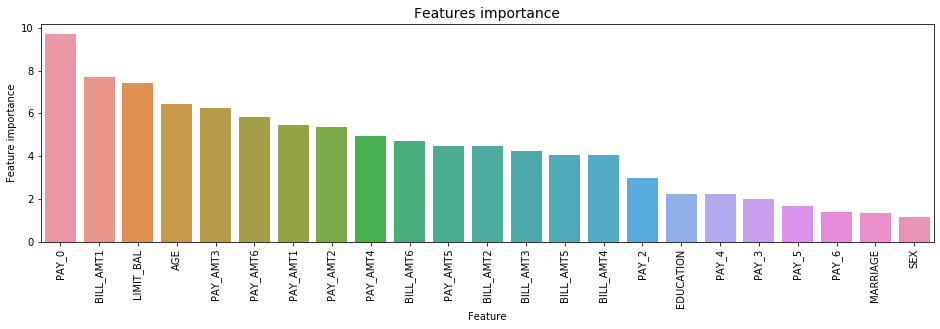

In [57]:
#Features importance
import matplotlib.pyplot as plt
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': modelCatBoost.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [58]:
# Confusion Matrix
CM_CatBoost = confusion_matrix(y_test, predictions_CatBoost)
print (CM_CatBoost)



[[6626  383]
 [1250  741]]


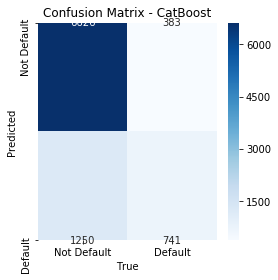

In [59]:
fig, ax = plt.subplots(ncols = 1, figsize=(4,4))

sns.heatmap(CM_CatBoost, 
            yticklabels=['Not Default', 'Default'],
            xticklabels=['Not Default', 'Default'],
            linecolor="Darkblue", cmap="Blues", fmt="d", annot=True)

plt.ylabel('Predicted')
plt.xlabel('True')
plt.title("Confusion Matrix - CatBoost");


In [60]:
from astropy.table import Table, Column
data_rows = [('Random Forest', 'original', 0.83, 0.94, 0.88),
              ('AdaBoostClassifier', 'original', 0.83, 0.96, 0.89),
             ('CatBoostClassifier', 'original', 0.84, 0.95, 0.89)
            ]
t = Table(rows=data_rows, names=('Model', 'Data', 'Precision', 'Recall', 'F1'))
print(t)

      Model          Data   Precision Recall  F1 
------------------ -------- --------- ------ ----
     Random Forest original      0.83   0.94 0.88
AdaBoostClassifier original      0.83   0.96 0.89
CatBoostClassifier original      0.84   0.95 0.89
